# Fake News Classifier - Vectorizer

In [3]:
import pandas as pd

In [4]:
df =  pd.read_csv('fake-news/train.csv')

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df.shape

(20800, 5)

In [7]:
# Get independent features
X = df.drop(['label'],axis='columns')

In [8]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [9]:
y = df['label']

In [10]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [11]:
X.shape

(20800, 4)

In [12]:
y.shape

(20800,)

In [13]:
## Data cleaning and perprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [14]:
df = df.dropna()

In [15]:
df.shape

(18285, 5)

In [16]:
messages = df.copy()

In [17]:
messages.reset_index(inplace=True)

In [18]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [19]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [38]:
ps = PorterStemmer()
corpus = []
for i in range(len(messages)):
    regex = "[^a-zA-Z]"
    review = re.sub(regex,' ',messages['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [39]:
corpus[4]

'iranian woman jail fiction unpublish stori woman stone death adulteri'

In [40]:
## Applying the CountVectorizer
## Create a BOW model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [41]:
X.shape

(18285, 5000)

In [42]:
y = messages['label']

In [43]:
y.shape

(18285,)

In [44]:
## Divide the train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [45]:
### get the features name by ng gram comparision
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [46]:
## Detailes about CountVectorizer
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [47]:
count_df = pd.DataFrame(X_train,columns=cv.get_feature_names())

In [48]:
count_df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
import matplotlib.pyplot as plt

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [57]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [58]:
from sklearn import metrics
import numpy as np
import itertools

accuracy: 0.902
Confusion matrix, without normalization


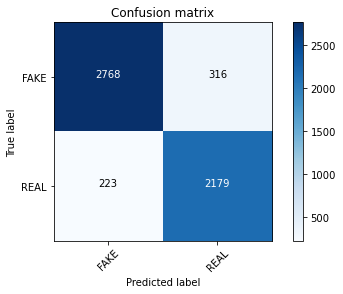

In [59]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f"% score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes=['FAKE','REAL'])

In [60]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9017499088589136

In [61]:
y_train.shape

(12799,)

### Passive Aggressive Classifier Algorithm

In [63]:
from sklearn.linear_model import PassiveAggressiveClassifier


In [64]:
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.916
Confusion matrix, without normalization


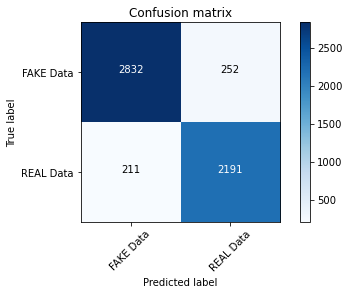

In [65]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [66]:
classifier=MultinomialNB(alpha=0.1)

In [67]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8904484141450966
Alpha: 0.1, Score : 0.9030258840685381
Alpha: 0.2, Score : 0.9030258840685381
Alpha: 0.30000000000000004, Score : 0.9026613197229311
Alpha: 0.4, Score : 0.9019321910317171
Alpha: 0.5, Score : 0.9024790375501276
Alpha: 0.6000000000000001, Score : 0.9028436018957346
Alpha: 0.7000000000000001, Score : 0.9035727305869486
Alpha: 0.8, Score : 0.9030258840685381
Alpha: 0.9, Score : 0.9032081662413416


In [68]:
## Get Features names
feature_names = cv.get_feature_names()

In [69]:
classifier.coef_[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([ -9.13851551,  -8.66088795,  -9.13851551, ..., -10.83311123,
        -8.7962293 ,  -9.36677416])

In [70]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.9920894686099926, 'trump'),
 (-4.283778449404154, 'hillari'),
 (-4.375295545839294, 'clinton'),
 (-4.8873997935153906, 'elect'),
 (-5.144630412704637, 'new'),
 (-5.239226293337629, 'comment'),
 (-5.272857037363478, 'video'),
 (-5.400360096919867, 'war'),
 (-5.400360096919867, 'us'),
 (-5.400360096919867, 'hillari clinton'),
 (-5.434948525093684, 'fbi'),
 (-5.450146386003116, 'vote'),
 (-5.535349569997123, 'email'),
 (-5.592540682275724, 'world'),
 (-5.628494225203827, 'obama'),
 (-5.717782305845059, 'donald'),
 (-5.751706861626975, 'donald trump'),
 (-5.7656056260177895, 'russia'),
 (-5.868713801008469, 'day'),
 (-5.868713801008469, 'america')]

In [71]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.833111226611438, 'abe'),
 (-10.833111226611438, 'abroad'),
 (-10.833111226611438, 'abus new'),
 (-10.833111226611438, 'abus new york'),
 (-10.833111226611438, 'act new'),
 (-10.833111226611438, 'act new york'),
 (-10.833111226611438, 'advic'),
 (-10.833111226611438, 'advis new'),
 (-10.833111226611438, 'advis new york'),
 (-10.833111226611438, 'age new'),
 (-10.833111226611438, 'age new york'),
 (-10.833111226611438, 'agenda breitbart'),
 (-10.833111226611438, 'ail'),
 (-10.833111226611438, 'aleppo new'),
 (-10.833111226611438, 'aleppo new york'),
 (-10.833111226611438, 'ali'),
 (-10.833111226611438, 'america breitbart'),
 (-10.833111226611438, 'america new york'),
 (-10.833111226611438, 'american breitbart'),
 (-10.833111226611438, 'american new'),
 (-10.833111226611438, 'american new york'),
 (-10.833111226611438, 'ami'),
 (-10.833111226611438, 'ami schumer'),
 (-10.833111226611438, 'amp'),
 (-10.833111226611438, 'applaud'),
 (-10.833111226611438, 'arson'),
 (-10.83311122661143